# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [14]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

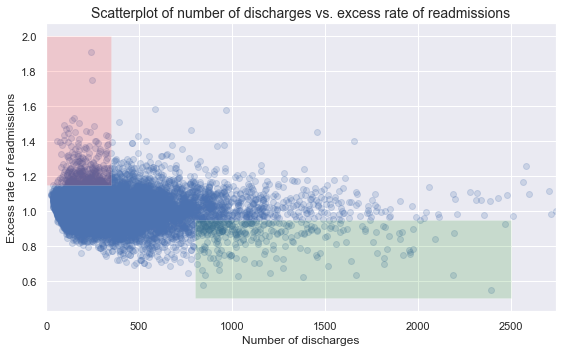

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

##### A. Do you agree with the above analysis and recommendations? Why or why not?

In [5]:
# A. Initial observations based on the plot above

# 1) Overall, rate of readmissions is trending down with increasing number of discharges
# 2) With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
# 3) With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

1) What is implied is that there is a negative correlation between number of discharges and the rate of readmissions, although when looking at the scatterplot it does not seem that strong. What can be done is to compute the Pearson correlation coefficient, and then, just to be more confident about the result, do a hypothesis test to check if the observed value was not due by chance. Also, the y-axis could have been labeled only 'rate of readmissions', just to be clear, since it is only considered an excess when it is above 1, but that is how it is in the data tough.

2) Although the first sentence seems true (if we consider until 500-750), the red shaded area counts the incidences of excess rate of readmissions between an interval of number of discharges much smaller than the green shaded area, so it is a bit misleading. The red shaded area is between more or less 0 and 400 number of discharges, while the green shaded are between more or less 800 and 2500. Both areas leave aside a large amount of data, between more or less 0.8 and 1.2 of the y-axis.

3) The sentence does not seem clear. If we consider from 800 until the maximum number of discharges it may be the opposite.

In [6]:
# B. Statistics

# In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have 
# excess readmission rate greater than 1.
# In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have
# excess readmission rate greater than 1.

In [7]:
# number of discharges < 100
num_dis = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio']
print("hospitals/facilities with number of discharges < 100, mean excess readmission rate:", round(num_dis.mean(), 3))

a = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & (clean_hospital_read_df['Excess Readmission Ratio'] > 1)].count().State
b = len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100])
print("hospitals/facilities with number of discharges < 100,excess readmission rate greater than 1:", round(a / b, 2))

# number of discharges > 1000
num_dis_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio']
print("\nhospitals/facilities with number of discharges > 1000, mean excess readmission rate:", round(num_dis_1000.mean(), 3))

c = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000) & (clean_hospital_read_df['Excess Readmission Ratio'] > 1)].count().State
d = len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000])
print("hospitals/facilities with number of discharges > 1000,excess readmission rate greater than 1:", round(c / d, 2))

hospitals/facilities with number of discharges < 100, mean excess readmission rate: 1.023
hospitals/facilities with number of discharges < 100,excess readmission rate greater than 1: 0.59

hospitals/facilities with number of discharges > 1000, mean excess readmission rate: 0.978
hospitals/facilities with number of discharges > 1000,excess readmission rate greater than 1: 0.44


The mean of excess readmission rate greater than 1 in hospitals/facilities with number of discharges < 100 is 59 and not 63%.

In [8]:
# C. Conclusions

# There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
# Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications
# that lead to readmissions.

1) As mentioned, it is not clear in the graphic that there is a significant correlation. We could check that by computing the correlation coefficient and making an appropriate test.

2) It may be so, but based on what is presented that conclusion is premature.

In [9]:
# D. Regulatory policy recommendations

# Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for
# quality care to continue operation.
# Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number 
# of them with higher capacity and number of discharges.

It could be clearer if small is considered < 100 or < 300. In any case, more statistical analysis could be beneficial before making those recommendations.

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

##### 1) Setup an appropriate hypothesis test.

Null hypothesis: "There is 0 correlation between the Number of Discharges and the Excess Readmission Ratio"

Alternate hypothesis: "There is a correlation between the Number of Discharges and the Excess Readmission Ratio"

test statistic: "pearson correlation coefficient"

##### 2) Compute and report the observed significance value (or p-value).

I will do permutations on the 'Number of Discharges' while leaving the 'Excess Readmission Ratio' fixed, since it is computationally more efficient. This will simulate the hypothesis that they are totally independent of each other.

In [10]:
# pearson correlation coefficient formula
def pearson_r(data_1, data_2):
    return np.corrcoef(data_1, data_2)[0, 1]

# observed correlation coefficient
obs_corr = pearson_r(x, y)
print("The observed correlation coefficient is", obs_corr)


# 10000 permutations
perm_replicates = np.empty(10000)

for i in range(len(perm_replicates)):
    x_permuted = np.random.permutation(x)
    perm_replicates[i] = pearson_r(x_permuted, y)

# p-value
p_value = np.sum(perm_replicates <= obs_corr) / len(perm_replicates)

print("p-value:", p_value)


The observed correlation coefficient is -0.09309554287590444
p-value: 0.0


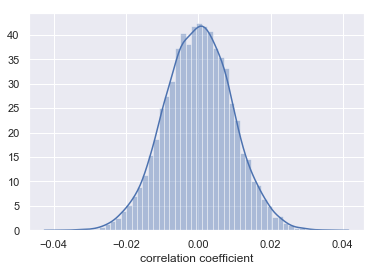

In [15]:
# distribution of the permutations made
sns.distplot(perm_replicates)
plt.xlabel("correlation coefficient")
plt.show()

Admitting a significance level of 5%, we have statistical evidence to reject the null hypothesis that states that there is 0 correlation between the Number of Discharges and the Excess Readmission Ratio.

##### 3) Report statistical significance for  𝛼  = .01.

The conclusion is the same for 𝛼 = .01

##### 4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The p-value makes it clear that there is significant correlation between the two variables, it is almost null. In practice, however, many factors should be taken into consideration before recommending changes on Directives and incentives. We should see how the predicted 30-day values are computed, a main factor in subsequent conclusions. We should check other variables: for example, some states could have positive or null correlation, which seems admissible given that the coefficient is not that big. We should balance the observed correlation coefficient with the costs of implementing changes, and it is different having a correlation coefficient of -9% and -70%. We could check other factors that may have more impact. Correlation does not imply causality too. 

##### 5) Look at the scatterplot above.
 - What are the advantages and disadvantages of using this plot to convey information?

The big advantages are that we can grasp the big picture of a lot of data in a single image, we usually absorb more information visually, and we can even detect patterns when relating with other information we have. The disadvantages are that it can also me misleading if we do not pay attention and relate to other factors which are inevitably involved in any decision.  

 - Construct another plot that conveys the same information in a more direct manner.

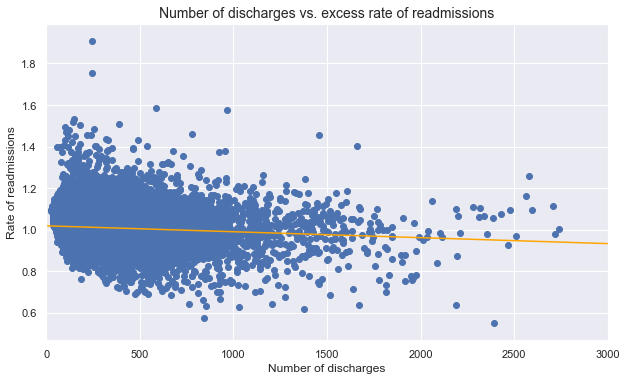

In [12]:
# building a regression line
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
x = np.array([0, 3000])
y = a * x + b
plt.plot(x, y, color='orange')

plt.xlim([0, max(x)])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Rate of readmissions', fontsize=12)
plt.title('Number of discharges vs. excess rate of readmissions', fontsize=14)

#plot
plt.subplots_adjust(left=0, bottom=-0.3, right=1.3, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

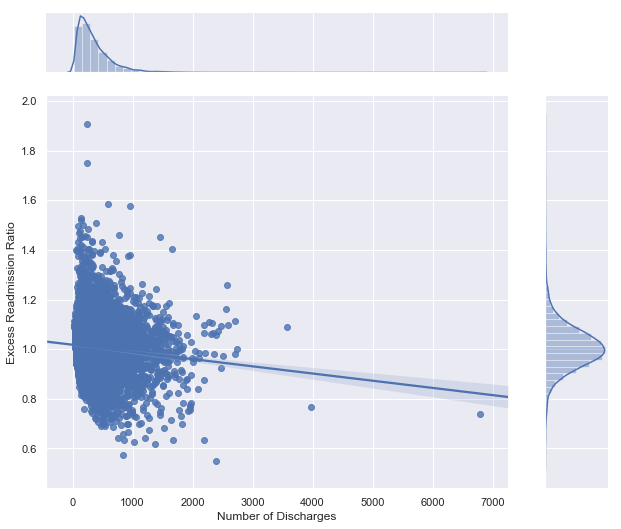

In [13]:
# or
sns.jointplot(x="Number of Discharges", y="Excess Readmission Ratio", data=clean_hospital_read_df, kind="reg")
plt.subplots_adjust(left=0, bottom=-0.3, right=1.3, top=0.8, wspace=0.6, hspace=0.4)
plt.show()